In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv("titanic.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Dealing with missing values

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
# Step 1: Drop the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

In [39]:
# Step 2: Calculate the mean of the 'Age' column
age_mean = df['Age'].mean()

# Step 3: Fill missing values in the 'Age' column with its mean
df['Age'].fillna(age_mean, inplace=True)


In [40]:
mean_fare = df['Fare'].mean()
df['Fare'].fillna(mean_fare, inplace=True)


### Label encoding and hot encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['sex_encoded']=label_encoder.fit_transform(df['Sex'])

In [42]:
df['sex_encoded'].head()

0    1
1    0
2    1
3    1
4    0
Name: sex_encoded, dtype: int32

In [43]:
df['embarked_encoded']=label_encoder.fit_transform(df['Embarked'])

In [44]:
df['embarked_encoded'].head()

0    1
1    2
2    1
3    2
4    2
Name: embarked_encoded, dtype: int32

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_encoded,embarked_encoded
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,2


In [46]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_encoded,embarked_encoded
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,1,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,1,2
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,1,2
417,1309,0,3,"Peter, Master. Michael J",male,30.27259,1,1,2668,22.3583,C,1,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Survived          418 non-null    int64  
 2   Pclass            418 non-null    int64  
 3   Name              418 non-null    object 
 4   Sex               418 non-null    object 
 5   Age               418 non-null    float64
 6   SibSp             418 non-null    int64  
 7   Parch             418 non-null    int64  
 8   Ticket            418 non-null    object 
 9   Fare              418 non-null    float64
 10  Embarked          418 non-null    object 
 11  sex_encoded       418 non-null    int32  
 12  embarked_encoded  418 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 39.3+ KB


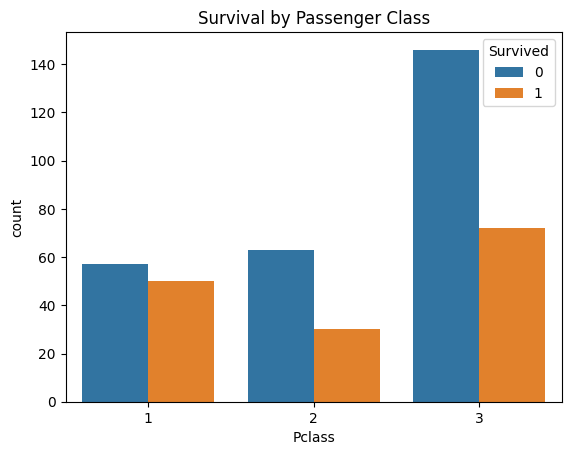

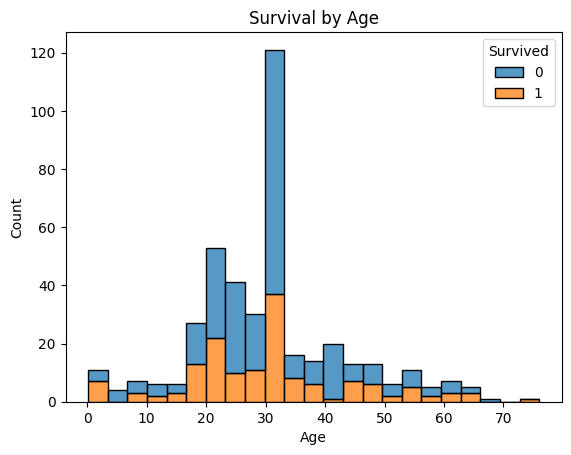

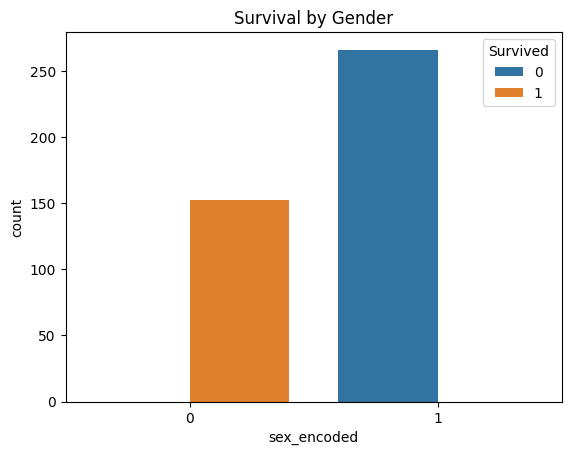

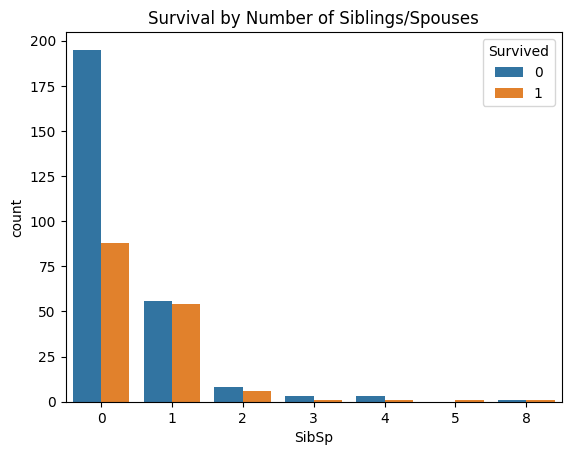

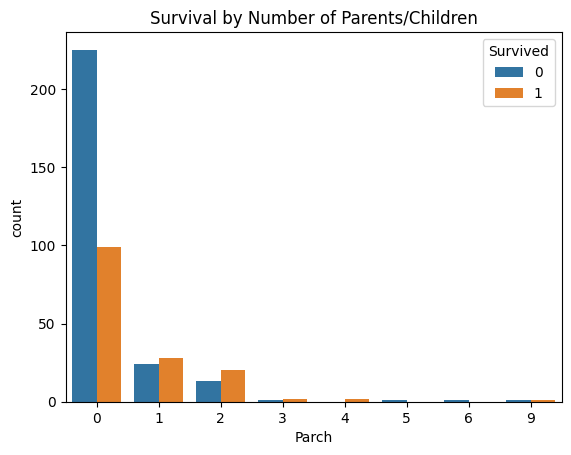

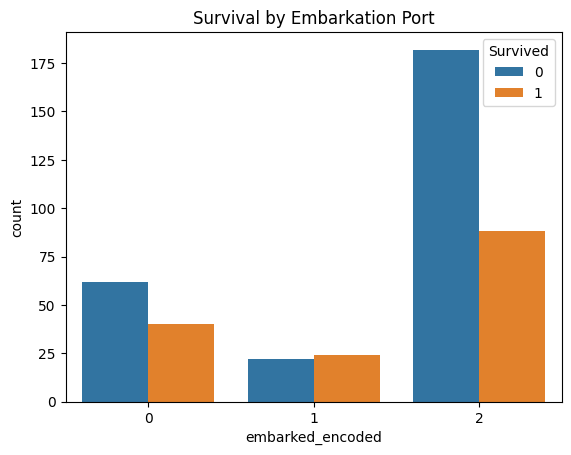

In [48]:
# Visualize survival based on passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Visualize survival based on age
sns.histplot(x='Age', hue='Survived', data=df, multiple='stack')
plt.title('Survival by Age')
plt.show()

# Visualize survival based on gender
sns.countplot(x='sex_encoded', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Visualize survival based on number of siblings/spouses
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival by Number of Siblings/Spouses')
plt.show()

# Visualize survival based on number of parents/children
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival by Number of Parents/Children')
plt.show()

# Visualize survival based on embarkation port
sns.countplot(x='embarked_encoded', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()


In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_encoded,embarked_encoded
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,2


In [50]:
# Split the data into features (X) and the target variable (y)
X = df[['Age','Pclass','sex_encoded','SibSp','Parch','embarked_encoded']]
y = df['Survived']

In [51]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [53]:
predict=model.predict(X_test)
predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy*100)


Accuracy: 100.0


In [55]:
import numpy as np

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_encoded,embarked_encoded
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,2


In [57]:
prediction = model.predict([[34.5,3,1,0,0,1]])
print("Prediction:", prediction)

Prediction: [0]


c:\Users\ansma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
